In [92]:
# import numpy and pandas and matplotlib (as plt)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784')

## Purpose:
Classify MNSIT using SVCs (SVM classifiers) and kernels. MNIST is a dataset of handwritten digits; the task is to classify the digits as 0-9. The images themselves are 28 x 28 pixels large. 

## Data Set-up 

Import data and import train_test_split from sklearn.



In [124]:


X = data.data
y = data.target

# print the shape of X and y
print("X:",X.shape,"y:",y.shape)

# Use train_test_split. Keep test at 25%.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# The SVM algorithm runs in O(n^2) time, where n is the number of training points
# To prevent the algorithm from taking forever, take only the first 10000 data points
# from the training set and the first 2000 data points from the test set

X_train, y_train = X_train.iloc[:10000], y_train.iloc[:10000]
X_test, y_test = X_test.iloc[:2000], y_test.iloc[:2000]
print("X:" ,X_train.shape, X_test.shape,"y:", y_train.shape, y_test.shape)


X: (70000, 784) y: (70000,)
X: (10000, 784) (2000, 784) y: (10000,) (2000,)


We will only use 1's and 7's for our classification problem. The following code block should filter out only the 1's and 7's:

In [125]:
# Make new test and train sets with only 1's and 7's
X_train, X_test, y_train, y_test=np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_test = [X_test[i,:] for i in range(2000) if y_test[i] in ['1','7']]
y_test = [y_test[i] for i in range(2000) if y_test[i] in ['1','7']]
X_train = [X_train[i,:] for i in range(2000) if y_train[i] in ['1','7']]
y_train = [y_train[i] for i in range(2000) if y_train[i] in ['1','7']]


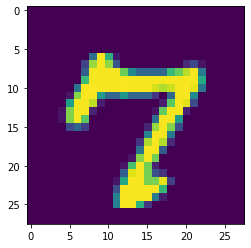

In [127]:
# Use this to visualize the dataset
# Feel free to change the index
plt.imshow(X_train[69].reshape(28,28))
plt.show()

## Use PCA from sklearn
We will use Principal Component Analysis (PCA) to manipulate the data to make it more usable for SVC. The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set by projecting the data on to a space while still retaining as much variance in the data as possible.

In [128]:
# import PCA
from sklearn.decomposition import PCA

# There are a total of 28 * 28 features (one per pixel)
# Let's project this down to 2 features using pca (2 features so we can plot out the data in 2-d)
pca = PCA(n_components=2)

# Use pca to transform X_train, X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

#print the shape of X_train_pca 
print(X_train_pca.shape)


(431, 2)


What change do you notice between our old training data and our new one?

Answer:

## SVC and Kernels

Now we will experiment with support vector classifiers and kernels. We will need LinearSVC, SVC, and accuracy_score.

SVMs are really interesting because they have something called the dual formulation, in which the computation is expressed as training point inner products. This means that data can be lifted into higher dimensions easily with this "kernel trick". Data that is not linearly separable in a lower dimension can be linearly separable in a higher dimension - which is why we conduct the transform. Let us experiment.

A transformation that lifts the data into a higher-dimensional space is called a kernel. A poly- nomial kernel expands the feature space by computing all the polynomial cross terms to a specific degree.

In [129]:
# import SVC, LinearSVC, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# fit the LinearSVC on X_train_pca and y_train and then print train accuracy and test accuracy
lsvc = LinearSVC().fit(X_train_pca, y_train)

print('train acc: ', accuracy_score(y_train, lsvc.predict(X_train_pca)))
print('test acc: ', accuracy_score(y_test, lsvc.predict(X_test_pca)))
        
# use SVC with an RBF kernel. Fit this model on X_train_pca and y_train and print accuracy metrics as before
svc = SVC().fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(y_train, svc.predict(X_train_pca))) 
print('test acc: ', accuracy_score(y_test, svc.predict(X_test_pca)))



train acc:  0.974477958236659
test acc:  0.9607390300230947
train acc:  0.988399071925754
test acc:  0.9815242494226328


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Visualize

Now plot out all the data points in the test set. Ones should be colored red and sevens should be colored blue. We have already provided the code to plot the decision boundary. The plot is a reault of using PCA on a 784 dimensional data.

Hint: `plt.scatter`

(231, 2) (202, 2)


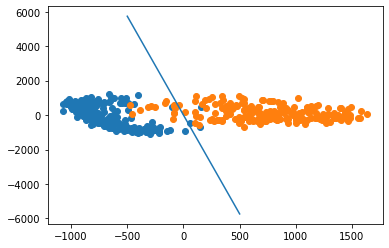

In [142]:
x1 = np.array([X_test_pca[i] for i in range(len(y_test)) if y_test[i]=='1'])
x7 = np.array([X_test_pca[i] for i in range(len(y_test)) if y_test[i]=='7'])
print(x1.shape, x7.shape)
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x7[:,0],x7[:,1])
# Code to plot the decision boundary of a linear svm

weights = lsvc.coef_[0]
x = np.linspace(-500,500,100)
y = x / weights[1] * -weights[0]
plt.plot(x,y)

plt.show()

### Sort!

Now we're going to do a kind of hack. We've trained a linearSVM (SVC) on a binary classification problem. But what if we wanted something more regression-like? Say we wanted to score each datapoint on how "one-y" or how "seven-y" it looked. How would we do that? Check out the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).

In the block below, create a list of scores for each datapoint in `X_test_pca`. Then sort `X_test` using the scores from `X_test_pca` (we're using `X_test` instead of `X_test_pca` because we want to plot the images). The block after contains code to plot out the sorted images. You should see 1's gradually turn in to 7's.

In [148]:
scores = lsvc.decision_function(X_test_pca)
lst1 = list(zip(X_test,scores))
lst1.sort(key = lambda x : x[1])
sorted_X = [i[0] for i in lst1]

Code to plot the images (this may take some time)

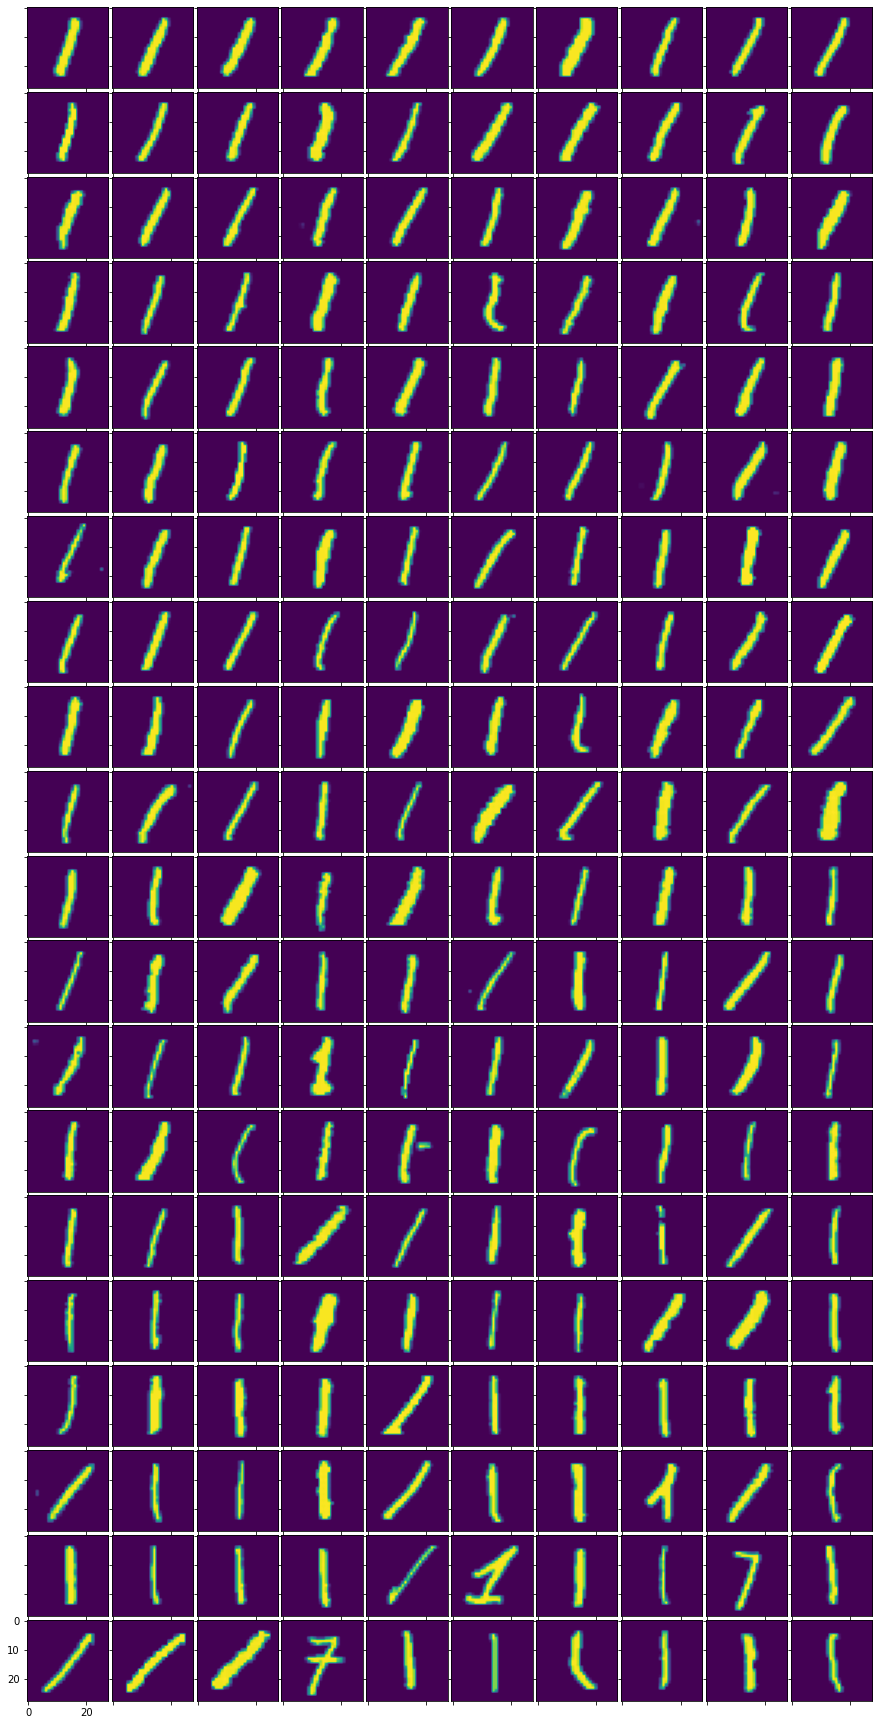

In [146]:
from mpl_toolkits.axes_grid1 import AxesGrid

def plot(x):
    plt.imshow(x.reshape(28,28))
    plt.show()

def plot_dataset(X):
    fig = plt.figure(1, (60, 60))

    fig.subplots_adjust(left=0.05, right=0.95)
    
    grid = AxesGrid(fig, 141,  # similar to subplot(141)
                    nrows_ncols=(20, 10),
                    axes_pad=0.05,
                    label_mode="1",
                    )
    
    for i in range(200):
        grid[i].imshow(X[i].reshape(28,28))

# We're assuming sorted_X has ~200 datapoints in it
# This may take a long time to run
plot_dataset(sorted_X)

## Conclusions

1) What is a kernel and why is it important?
- A kernel transforms data by lifting it into higher dimensional space. This is important because data is often not separable or easily classifiable at lower dimensions but it could be on higher dimensions.

2) Can we kernelize all types of data (numerical vs categorical ...) ? Why or why not?
- All types of non-linear numerical data can be kernelized. Sometimes, when there isnt any real correlation intended with the given features this will just result in overfitting or inconclusive regression/classification. For linear numerical data, you could kernelize but it wouldn't help since the correlation already exists in low dimensions. For categorical data, you can't really do much to kernelize unless you can get scores of some sort and convert to numerical.

3) What are some pros/cons of kernels? (look into runtime)
- More kernels is stronger correlations, better fit, better accuracy, but more runtime, more memory space held, and more processor units used.